In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dados_vinho = pd.DataFrame({
    'teor alcoolico':[3,4,5,6],
    'acidez': ['muito','pouco','medio','baixo'],
    'ph' : [4.3,2.8,4.2,3.9],
})

In [3]:
dados_vinho.head()

,teor alcoolico,acidez,ph
0,3,muito,4.3
1,4,pouco,2.8
2,5,medio,4.2
3,6,baixo,3.9


In [4]:
dados_vinho = pd.get_dummies(dados_vinho, columns=['acidez'])

In [7]:
dados_vinho

,teor alcoolico,ph,acidez_baixo,acidez_medio,acidez_muito,acidez_pouco
0,3,4.3,False,False,True,False
1,4,2.8,False,False,False,True
2,5,4.2,False,True,False,False
3,6,3.9,True,False,False,False


In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados_vinho)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [18]:
sse = kmeans.inertia_
print(sse)

0.0


In [16]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'segmentação de vinhos')

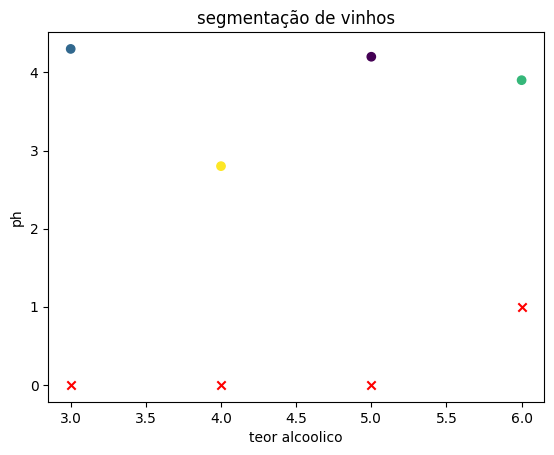

In [19]:
plt.scatter(dados_vinho['teor alcoolico'],dados_vinho['ph'],c=labels)
plt.scatter(centroids[:,0],centroids[:,2],marker= 'x', color='red')
plt.xlabel('teor alcoolico')
plt.ylabel('ph')
plt.title('segmentação de vinhos')

In [20]:
dados_vinho['grupo'] = labels
grouped_data = dados_vinho.groupby('grupo').mean()
print(grouped_data)

       teor alcoolico   ph  acidez_baixo  acidez_medio  acidez_muito  \
grupo                                                                  
0                 5.0  4.2           0.0           1.0           0.0   
1                 3.0  4.3           0.0           0.0           1.0   
2                 6.0  3.9           1.0           0.0           0.0   
3                 4.0  2.8           0.0           0.0           0.0   

       acidez_pouco  
grupo                
0               0.0  
1               0.0  
2               0.0  
3               1.0  
